# **ML project | General data collection (and preprocessing)**

## **I. Overview**

This notebook is mostly meant for:

1. Familiarizing with the dataset;
2. Generating necessary RGB images from the dataset;
3. Calculating some of the vegetation indexes.

**Dropbox link** -> https://www.dropbox.com/sh/uwvpofzisaxw5a2/AAAYiuO8dU9P5Ve2t2gap_SOa?dl=0 


## **II. Project dataset collection**

In [ ]:
# Mount the drive in shell ->
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to project folder ->
%cd /content/drive/My Drive/Colab Notebooks/Machine learning project/

/content/drive/My Drive/Colab Notebooks/Machine learning project


In [ ]:
# Create folder for Dropox data and change dir to that folder ->
#!mkdir "Dropbox data"
%cd /content/drive/My Drive/Colab Notebooks/Machine learning project/Dropbox data

In [ ]:
# Create folder for the Drone images and download the Drone images folder from Dropbox ->
#!mkdir "Drone images"
#!wget -P /content/drive/MyDrive/Colab Notebooks/Machine learning project/Dropbox data/Drone images https://www.dropbox.com/sh/uwvpofzisaxw5a2/AAC-HTXDH_oDPiuhB-wGBI2Ua/DroneImages?dl=0&lst=

--2021-11-09 19:33:36--  http://notebooks/Machine
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’
--2021-11-09 19:33:37--  http://learning/
Resolving learning (learning)... failed: Name or service not known.
wget: unable to resolve host address ‘learning’
--2021-11-09 19:33:37--  http://project/Dropbox
Resolving project (project)... failed: Name or service not known.
wget: unable to resolve host address ‘project’
--2021-11-09 19:33:37--  http://data/Drone
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
--2021-11-09 19:33:37--  http://images/
Resolving images (images)... failed: Name or service not known.
wget: unable to resolve host address ‘images’
--2021-11-09 19:33:37--  https://www.dropbox.com/sh/uwvpofzisaxw5a2/AAC-HTXDH_oDPiuhB-wGBI2Ua/DroneImages?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Conne

In [ ]:
# Create folder for the Phenocart images and download the Phenocart images folder from Dropbox ->
#!mkdir "Phenocart images"
#!wget -cq https://www.dropbox.com/sh/uwvpofzisaxw5a2/AABPWvfemJ2zC5sD1EQwq5D4a/PhenocartImages?dl=0&lst=

--2021-11-09 19:42:47--  http://notebooks/Machine
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’
--2021-11-09 19:42:47--  http://learning/
Resolving learning (learning)... failed: Name or service not known.
wget: unable to resolve host address ‘learning’
--2021-11-09 19:42:47--  http://project/Dropbox
Resolving project (project)... failed: Name or service not known.
wget: unable to resolve host address ‘project’
--2021-11-09 19:42:47--  http://data/Phenocart
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
--2021-11-09 19:42:47--  http://images/
Resolving images (images)... failed: Name or service not known.
wget: unable to resolve host address ‘images’
--2021-11-09 19:42:48--  https://www.dropbox.com/sh/uwvpofzisaxw5a2/AABPWvfemJ2zC5sD1EQwq5D4a/PhenocartImages?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:11

## **III. General data processing**

In [ ]:
# Imports for data processing
import cv2
import numpy as np
import matplotlib.pyplot as plt 

from google.colab.patches import cv2_imshow

### **Testing rasterio package**

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
# Rasterio package imports ->
import rasterio
from rasterio.plot import show

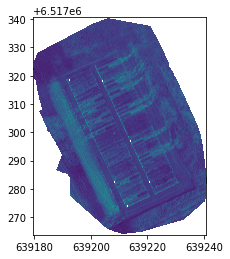

In [ ]:
# Reading and showing one band image from .tif file
fp = r'NobalWheat_NUE_4-8-2021_20m_transparent_reflectance_blue.tif'
img = rasterio.open(fp)
show(img)

In [ ]:
# Checking that the .tif file would be 1 banded ->
print(img.count)

1


### **Testing gdal package**

In [ ]:
# Gdal package imports
from osgeo import gdal
import matplotlib.pyplot as plt

In [ ]:
# Reading R, G and B band from .tif file ->
image_r = r"NobalWheat_NUE_4-8-2021_20m_transparent_reflectance_red.tif"
image_g = r"NobalWheat_NUE_4-8-2021_20m_transparent_reflectance_green.tif"
image_b = r"NobalWheat_NUE_4-8-2021_20m_transparent_reflectance_blue.tif" 

In [ ]:
# Opening latter .tif files with gdal ->
image_r = gdal.Open(image_r)
image_g = gdal.Open(image_g)
image_b = gdal.Open(image_b)

In [ ]:
# Reading images as array files ->
b1 = image_r.ReadAsArray()
b2 = image_g.ReadAsArray()
b3 = image_b.ReadAsArray()

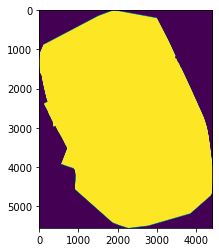

In [ ]:
# Showing the B band ->
plt.imshow(b3)
plt.show()

In [ ]:
# Stacking i.e merging the bands together ->
img = np.dstack((b1, b2, b3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


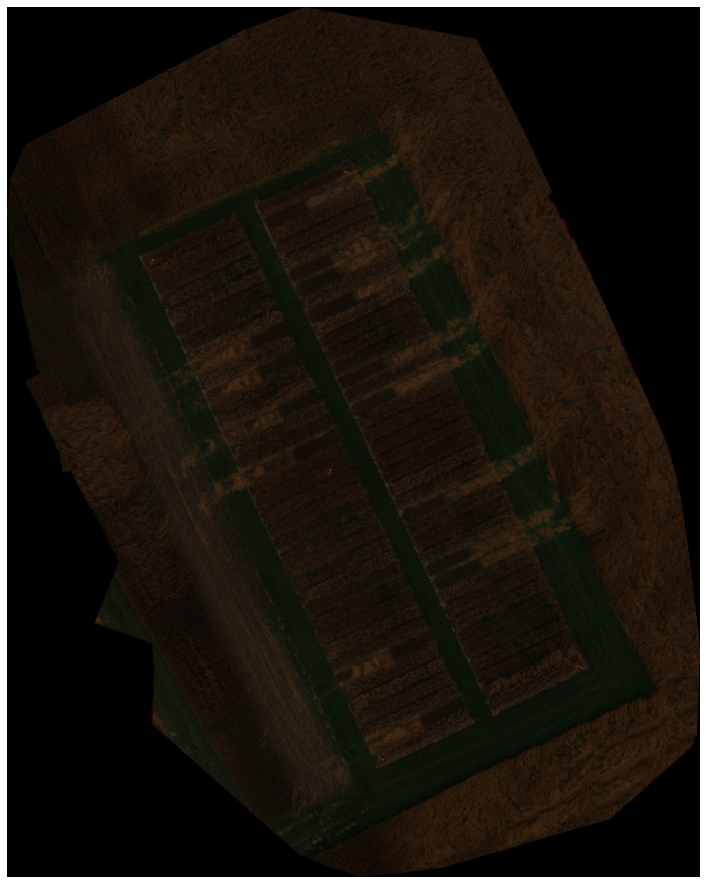

In [ ]:
# Showing the merged R-G-B image ->
plt.figure(figsize = (16,16))
plt.axis("off")

plt.imshow(img)

plt.savefig('Tiff.png', bbox_inches='tight', pad_inches=0, dpi=600) # dpi is important for better resolution
plt.show()

## **IV. Index pictures generation**

In [ ]:
def ndvi(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: ndvi image (ndvi_image)

  """
  ndvi_index = ((nir-red) / (nir + red))
  ndvi_image = ndvi_index

  return ndvi_image

In [ ]:
def gndvi(nir, green):
  """
  Input: nir image (nir) and green image (green)

  Output: gndvi image (gndvi_image)

  """
  gndvi_index = ((nir-green) / (nir + green))
  gndvi_image = gndvi_index

  return gndvi_image

In [ ]:
def wdrvi(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: wdrvi image (wdrvi_image)

  """
  wdrvi_index = (((0.2 * nir) - red) / ((0.2 * nir) + red))
  wdrvi_image = wdrvi_index

  return wdrvi_image

In [ ]:
def rdvi(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: rdvi image (rdvi_image)

  """
  rdvi_index = ((nir-red) / ((nir + red) ** (.5)))
  rdvi_image = rdvi_index

  return rdvi_image

In [ ]:
def msr(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: msr image (msr_image)

  """
  msr_index = (((nir-red) -1) / (((nir + red) ** (.5)) + 1))
  msr_image = msr_index

  return msr_image

In [ ]:
def revi(re, green):
  """
  Input: re image (re) and green image (green)

  Output: revi image (revi_image)

  """
  revi_index = ((re-greeen) / (re + green))
  revi_image = revi_index

  return revi_image

In [ ]:
def mtvi(nir, green, red):
  """
  Input: nir image (nir), green image (green) and red image (red)

  Output: mtvi image (mtvi_image)

  """
  mtvi_index = (1.2 * ((1.2 * (nir-green)) - (2.5 * (red-green))))
  mtvi_image = mtvi_index

  return mtvi_image

In [ ]:
def rvsi(nir, red, reg):
  """
  Input: nir image (nir), red image (red) and reg image (reg)

  Output: rvsi image (rvsi_image)

  """
  rvsi_index = (((red + nir) / 2) -reg)
  rvsi_image = rvsi_index

  return rvsi_image

In [ ]:
def wv_reswi(nir, red, reg):
  """
  Input: nir image (nir), red image (red) and reg image (reg)

  Output: wv_reswi image (wv_reswi_image)

  """
  wv_reswi_index = ((nir-red) /.173) * reg
  wv_reswi_image = wv_reswi_index

  return wv_reswi_image

In [ ]:
def gdvi(nir, red, reg):
  """
  Input: nir image (nir), red image (red) and reg image (reg)

  Output: gdvi image (gdvi_image)

  """
  gdvi_index = ((nir-red) /.173) * reg
  gdvi_image = gdvi_index

  return gdvi_image

In [ ]:
def grvi(nir, green):
  """
  Input: nir image (nir) and green image (green)

  Output: grvi image (grvi_image)

  """
  grvi_index = (nir / green)
  grvi_image = grvi_index

  return grvi_image


In [ ]:
def gipvi(nir, green):
  """
  Input: nir image (nir) and green image (green)

  Output: gipvi image (gipvi_image)

  """
  gipvi_index = (nir / (nir + green))
  gipvi_image = gipvi_index

  return gipvi_image

In [ ]:
def sr(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: sr image (sr_image)

  """
  sr_index = (nir / red)
  sr_image = sr_index

  return sr_image



In [ ]:
def gdi(nir, red, green):
  """
  Input: nir image (nir), red image (red) and green image (green)

  Output: gdi image (gdi_image)

  """
  gdi_index = nir-red + green
  gdi_image = gdi_index

  return gdi_image

In [ ]:
def grdi(nir, red, green):
  """
  Input: nir image (nir), red image (red) and green image (green)

  Output: grdi image (grdi_image)

  """
  grdi_index = ((green-red) / (green + red))
  grdi_image = grdi_index

  return grdi_image

In [ ]:
def ndvi_re(nir, red, green):
  """
  Input: nir image, red image (red) and green image (green)

  Output: ndvi re image (ndvi_re_image)

  """
  ndvi_re_index = ((nir-re) / (nir + re))
  ndvi_re_image = ndvi_re_index

  return ndvi_re_image

In [ ]:
def sr_re(nir, re):
  """
  Input: nir image (nir) and re image (re) 

  Output: sr_re image (sr_re_image)

  """
  sr_re_index = (nir / re)
  sr_re_image = sr_re_index

  return sr_re_image

In [ ]:
def datt4(red, green, re):
  """
  Input: red image (red), green image (green) and re image (re) 

  Output: datt4 image (datt4_image)

  """
  datt4_index = (red / (green * re))
  datt4_image = datt4_index

  return datt4_image

In [ ]:
def rtvi_core(nir, green, re):
  """
  Input: nir image (nir), green image (green) and re image (re) 

  Output: rtvi core image (rtvi_core_image)

  """
  rtvi_core_index = (100 * (nir-re)) - (10 * (nir-green))
  rtvi_core_image = rtvi_core_index

  return rtvi_core_image

In [ ]:
def ms_re(nir, re):
  """
  Input: nir image (nir) and re image (re)

  Output: ms_re image (ms_re_image)

  """
  ms_re_index = (((nir-re) -1) / (((nir + re) ** (.5)) + 1))
  ms_re_image = ms_re_index

  return ms_re_image

In [ ]:
def osavi(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: osavi image (osavi_image)

  """
  osavi_index = (1.16 * (nir-red) / (nir + red + .16)) # optimized SAVI L = 0.16, good for dense veg
  osavi_image = osavi_index

  return osavi_image

In [ ]:
def savi(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: savi image (savi_image)

  """
  savi_index = (1.5 * (nir-red) / (nir + red + .5)) #original SAVI Huete, 1988, version using L = 0.5 for medium veg
  savi_image = savi_index

  return savi_image

In [ ]:
def savil(nir, red):
  """
  Input: nir image (nir) and red image (red)

  Output: savil image (savil_image)

  """
  savil_index = ((nir-red) / (nir + red + 1)) * 2 # modified version using L = 1 for low veg
  savil_image = savil_index

  return savil_image

In [ ]:
def savire1(nir, re):
  """
  Input: nir image (nir) and re image (re)

  Output: savire1 image (savire1_image)

  """
  savire1_index = (1.355 * (NIR-RE) / (NIR + RE + .355)) # L = 0.355, Zhu et al CRC press 2012, best for early stage rice N est.
  savire1_image = savire1_index

  return savire1_image

In [ ]:
def savire2(nir, re):
  """
  Input: nir image (nir) and re image (re)

  Output: savire2 image (savire2_image)

  """
  savire2_index = (1.261 * (NIR-RE) / (NIR + RE + .261)) # L = 0.261, Zhu et al CRC press 2012, best for early stage rice N est.
  savire2_image = savire2_index

  return savire2_image

In [ ]:
def ari(nir, re):
  """
  Input: nir image (nir) and re image (re)

  Output: ari image (ari_image)

  """
  ari_index = nir * ((1 / green) - (1 / re)) # Greece 2004, Remote sensing in agriculture, Chl, caratnoids, anthocyanins
  ari_image = ari_index

  return ari_image